In [1909]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy import stats


In [1911]:
sales = pd.read_csv('WALMART_SALES_DATA.csv')
sales.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [1913]:
sales.info() # no null values and gives total entires 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [1915]:
# New Data set for each store
# df1 = sales.loc[sales['Store'] == 1]
# for df in pd.read_csv('WALMART_SALES_DATA.csv', chunksize = 143):
#     df.groupby(df['Store'])
#     print (df)
    
    

<h1>Representation of Statistics for each Store</h1>

In [1918]:
total = sales.groupby(['Store']).describe()
total

Weekly_Sales                                                        \
             count          mean            std         min          25%   
Store                                                                      
1            143.0  1.555264e+06  155980.767761  1316899.31  1458104.690   
2            143.0  1.925751e+06  237683.694682  1650394.44  1803500.635   
3            143.0  4.027044e+05   46319.631557   339597.38   367860.595   
4            143.0  2.094713e+06  266201.442297  1762539.30  1929611.490   
5            143.0  3.180118e+05   37737.965745   260636.71   294696.000   
6            143.0  1.564728e+06  212525.855862  1261253.18  1456147.170   
7            143.0  5.706173e+05  112585.469220   372673.61   497653.155   
8            143.0  9.087495e+05  106280.829881   772539.12   855905.435   
9            143.0  5.439806e+05   69028.666585   452905.22   506766.720   
10           143.0  1.899425e+06  302262.062504  1627707.31  1740771.310   
11           143.0  1.356383e+06  165833.887863  1100418.69  1267235.590   
12           143.0  1.009002e+06  139166.871880   802105.50   940077.460   
13           143.0  2.003620e+06  265506.995776  1633663.12  1877475.705   
14           143.0  2.020978e+06  317569.949476  1479514.66  1873297.900   
15           143.0  6.233125e+05  120538.652043   454183.42   565182.540   
16           143.0  5.192477e+05   85769.680133   368600.00   466043.285   
17           143.0  8.935814e+05  112162.936087   635862.55   817518.770   
18           143.0  1.084718e+06  176641.510839   540922.94  1000578.875   
19           143.0  1.444999e+06  191722.638730  1181204.53  1351960.260   
20           143.0  2.107677e+06  275900.562742  1761016.51  1950865.580   
21           143.0  7.560691e+05  128752.812853   596218.24   688848.930   
22           143.0  1.028501e+06  161251.350631   774262.28   961476.045   
23           143.0  1.389864e+06  249788.038068  1016756.10  1261918.815   
24           143.0  1.356755e+06  167745.677567  1057290.41  1254316.770   
25           143.0  7.067215e+05  112976.788600   558794.63   655484.635   
26           143.0  1.002912e+06  110431.288141   809833.21   938053.050   
27           143.0  1.775216e+06  239930.135688  1263534.86  1629423.370   
28           143.0  1.323522e+06  181758.967539  1079669.11  1189278.470   
29           143.0  5.394514e+05   99120.136596   395987.24   494461.215   
30           143.0  4.385796e+05   22809.665590   369722.32   426070.460   
31           143.0  1.395901e+06  125855.942933  1198071.60  1336419.660   
32           143.0  1.166568e+06  138017.252087   955463.84  1098315.065   
33           143.0  2.598617e+05   24132.927322   209986.25   242491.545   
34           143.0  9.667816e+05  104630.164676   836717.75   920238.620   
35           143.0  9.197250e+05  211243.457791   576332.05   801523.225   
36           143.0  3.735120e+05   60725.173579   270677.98   320540.030   
37           143.0  5.189003e+05   21837.461190   451327.61   507029.960   
38           143.0  3.857317e+05   42768.169450   303908.81   350365.655   
39           143.0  1.450668e+06  217466.454833  1158698.44  1316617.395   
40           143.0  9.641280e+05  119002.112858   764014.75   896637.670   
41           143.0  1.268125e+06  187907.162766   991941.73  1166352.440   
42           143.0  5.564039e+05   50262.925530   428953.60   515975.955   
43           143.0  6.333247e+05   40598.413260   505405.85   605517.605   
44           143.0  3.027489e+05   24762.832015   241937.11   283882.235   
45           143.0  7.859814e+05  130168.526635   617207.58   722791.565   

                                           Holiday_Flag           ...  \
              50%          75%         max        count     mean  ...   
Store                                                             ...   
1      1534849.64  1614892.030  2387950.20        143.0  0.06993  ...   
2      1879107.31  1956926.530  3436007.68        143.0  0.06993 

<h1>Finding the store with maximum sales</h1>

In [1921]:
stores_df = sales.groupby(['Store'])
Max_sales = stores_df.sum(numeric_only=True).sort_values("Weekly_Sales", ascending = False)
Max_sales.head()
# Same code as above in another way
# stores_df['Weekly_Sales'].agg('sum').sort_values(ascending = False).reset_index()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
20,3.013978e+08,10,7929.55,488.718,29892.452680,1054.112
4,2.995440e+08,10,8902.23,460.027,18401.192733,852.951
14,2.889999e+08,10,8264.11,488.718,26638.851959,1236.771
13,2.865177e+08,10,7678.69,469.919,18401.192733,1001.261
2,2.753824e+08,10,9754.94,460.417,30837.422420,1090.210


<h1>Graph of maximum sales per store</h1>

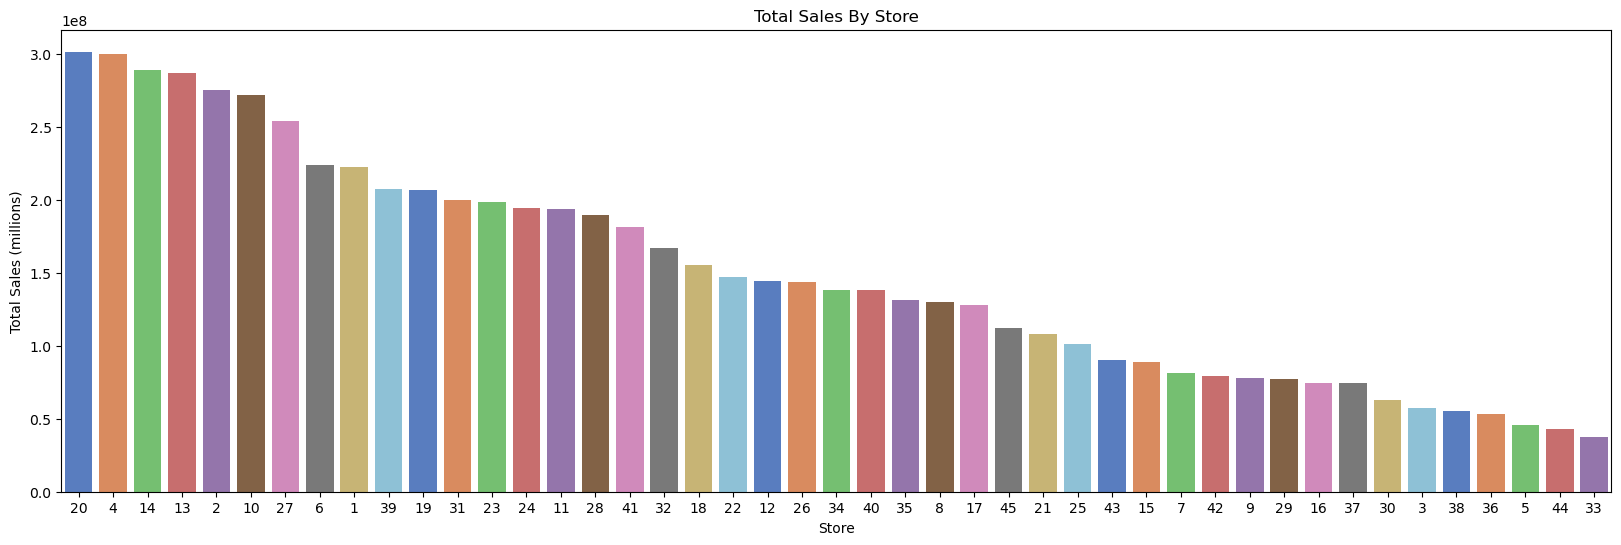

In [1924]:
plt.figure(figsize = (20,6))
barplot = sns.barplot(x = 'Store',
           y = 'Weekly_Sales',
           data = sales,
           estimator = np.sum,
           errorbar = None,
           palette = 'muted',
           order = sales.groupby('Store').agg('sum').reset_index().sort_values('Weekly_Sales', ascending = False)['Store']).set_title('Total Sales By Store',)
plt.ylabel('Total Sales (millions)')
plt.show()

<h1>Find the stores with highest Standard Deviation and Coefficient of Variation</h1>

<p>Below are two ways to find the std and CV%</p>
<br>
<p>This method is first attempt without .agg('std') method</p>

In [1927]:
# keep the columns of std and mean
std_total = total['Weekly_Sales'].drop(columns = ['count','min','25%', '50%', '75%','max']).sort_values('std', ascending = False)

# find the coefficient of variation within sales
std_total['mean'] = round((std_total['std']/std_total['mean']) * 100,2)

# rename columns to improve readability
std_total.rename(columns = {'std':'Sales std','mean':'CV%'}, inplace = True)

# Swap columns
std_total.head().reindex(columns = ['Sales std', 'CV%'])


,Sales std,CV%
Store,,
14,317569.949476,15.71
10,302262.062504,15.91
20,275900.562742,13.09
4,266201.442297,12.71
13,265506.995776,13.25


In [1929]:
# Takes the aggregate std of Weekly_Sales
std_sales = sales.groupby('Store')['Weekly_Sales'].agg('std').reset_index()

# Renames the column to reflect change
std_sales.rename(columns = {'Weekly_Sales': 'Sales std'},inplace = True)

# Takes the aggregate mean of Weekly_Sales
mean = sales.groupby('Store')['Weekly_Sales'].agg('mean').reset_index()

# Renames the column to reflect change
mean.rename(columns = {'Weekly_Sales': 'Mean_Sales'},inplace = True)

# Adds a column name CV% and the values for each store
std_sales["CV%"] = round((std_sales['Sales std']/mean['Mean_Sales']) * 100,2)
std_sales.sort_values(['Sales std'], ascending = False).head()

,Store,Sales std,CV%
13,14,317569.949476,15.71
9,10,302262.062504,15.91
19,20,275900.562742,13.09
3,4,266201.442297,12.71
12,13,265506.995776,13.25


<h1>Quarter 3 earnings in 2012</h1>

In [1933]:
# Fixes the date values
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst = True)
                              
# Dataframe of all sales in the 3rd Quarter of 2012
Q3 = sales.loc[(sales['Date'] >= '2012-07-01') & (sales['Date'] <= '2012-09-30')]

# Dataframe of the sales in the beginning and the end of the quarter
Q3_start = Q3.loc[Q3['Date'] == '2012-07-06'].reset_index(drop = True)
Q3_end = Q3.loc[Q3['Date'] == '2012-09-28'].reset_index(drop = True)

# New Dataframe for the growth
Q3_growth = Q3_start[['Store', 'Weekly_Sales']].copy()
Q3_growth.rename(columns = {'Weekly_Sales': 'Start_value'}, inplace = True)
Q3_growth['End_value'] = Q3_end['Weekly_Sales']
Q3_growth['Growth %'] = (Q3_growth['End_value'] - Q3_growth['Start_value'])/(Q3_growth['Start_value'])*100
Q3_growth.sort_values('Growth %', ascending = False).head()

,Store,Start_value,End_value,Growth %
36,37,519498.32,527953.14,1.627497
43,44,358461.58,355307.94,-0.879771
29,30,440553.42,425410.04,-3.437354
31,32,1214183.97,1157111.15,-4.700508
2,3,411206.50,389813.02,-5.202612


<h1>Mean Holiday Sales and non-Holiday days</h1>

In [1936]:
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12
super_bowl = sales[sales['Date'].isin(['2010-02-12','2011-02-11','2012-02-10'])]
labour_day = sales[sales['Date'].isin(['2010-09-10','2011-09-09','2012-09-07'])]
thanksgiving = sales[sales['Date'].isin(['2010-11-26','2011-11-25','2012-11-29'])]
christmas = sales[sales['Date'].isin(['2010-12-31','2011-12-30','2012-12-28'])]


# Non-holiday sales
non_holiday = sales[~sales['Date'].isin([super_bowl['Date'].unique(), labour_day['Date'].unique(),thanksgiving['Date'].unique(),christmas['Date'].unique()])]
#Non-holiday alternative code
non_holiday = sales[sales['Holiday_Flag'] == 0]

sales_compare = [['Super Bowl', super_bowl['Weekly_Sales'].mean()],
            ['Labour Day',labour_day['Weekly_Sales'].mean()],
            ['Thanksgiving', thanksgiving['Weekly_Sales'].mean()],
            ['Christmas',christmas['Weekly_Sales'].mean()],
                 ['Non-Holiday',non_holiday['Weekly_Sales'].mean()]
           ]

new_df = pd.DataFrame(sales_compare, columns = ["Occasion", "Sales"])
new_df

,Occasion,Sales
0,Super Bowl,1.079128e+06
1,Labour Day,1.042427e+06
2,Thanksgiving,1.471273e+06
3,Christmas,9.608331e+05
4,Non-Holiday,1.041256e+06


<h1>Graph of Sales</h1>

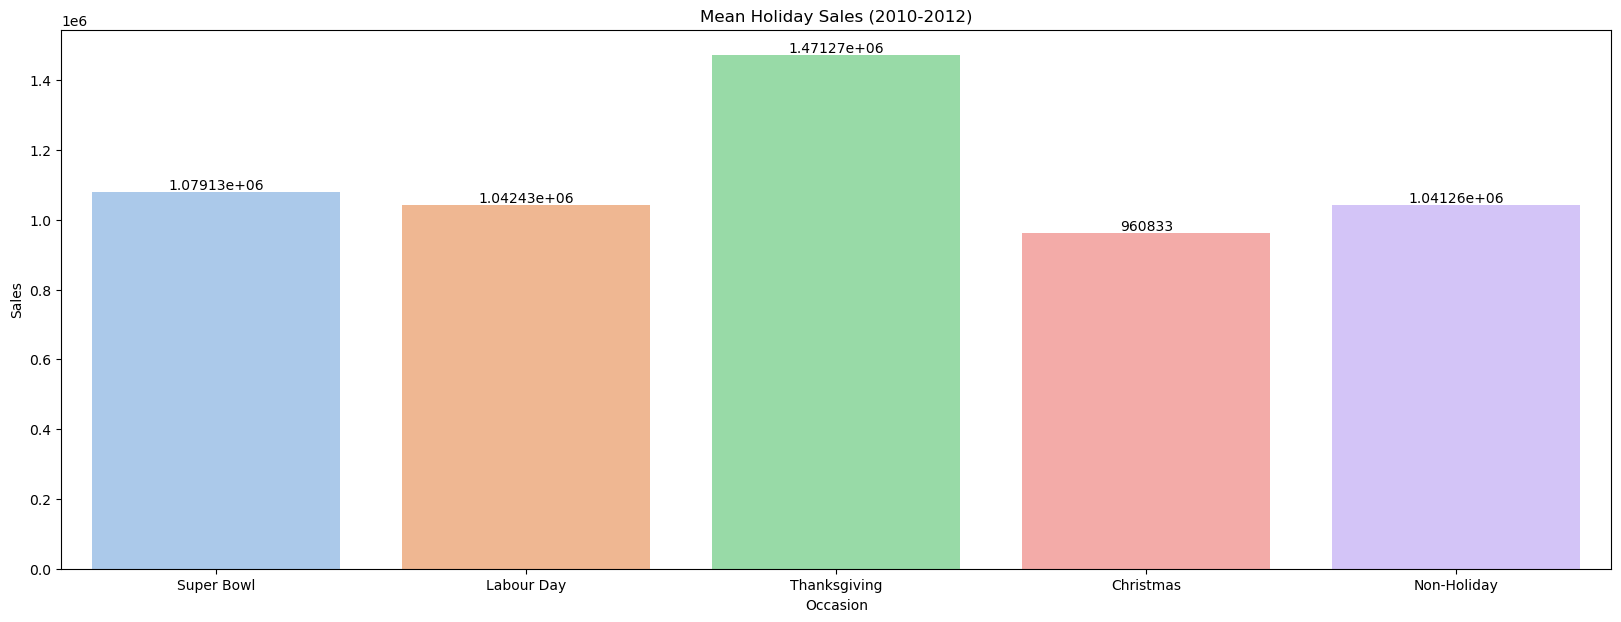

In [1938]:
plt.figure(figsize = (20,7))
barplot = sns.barplot(x = new_df['Occasion'],
                      y = new_df['Sales'],
                      errorbar = None,
                      palette = 'pastel')

for i in barplot.containers:
    barplot.bar_label(i,)

barplot.set(title = "Mean Holiday Sales (2010-2012)")
plt.show()


<p>From 2010-2012, the mean sales during holidays peaked during Thanksgiving while the lowest mean was during Christmas, which was lower than the mean sales of non-holiday days. As for the other holidays, the Super Bowl was slightly higher than the mean of non-holiday days while Labour Day was about the same to non-holidays.</p>

<h1>Monthly view of sales + insights</h1>

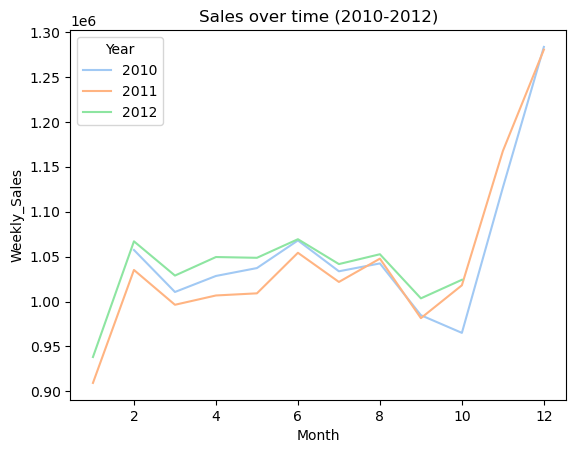

In [1942]:
sales['Year'] = sales['Date'].dt.year
sales['Month'] = sales['Date'].dt.month
longterm_sales = sales[['Month','Weekly_Sales','Year']]
longterm_sales


lineplot = sns.lineplot(x = "Month", y = 'Weekly_Sales',
    data = longterm_sales,
    hue = "Year",
    errorbar = None,
    palette = 'pastel')

lineplot.set(title = "Sales over time (2010-2012)")
plt.show()

<p>There is an increase in sales every year starting October. This follows a positive linear trend till December where sales dip starting January</p>

<h1>Store 1 – Build prediction models to forecast demand (Linear Regression) Hypothesize if CPI, unemployment, and fuel price have any impact on sales)</h1>

In [1946]:
# Create new dataframe with store 1 only 
store1 = sales.loc[0:142]
store1.rename(columns = {'Date': 'Day'}, inplace = True)
# Replace the Date column with days 
for index, row in store1.iterrows():
    store1['Day'][index] = index + 1

store1['Day'] = pd.to_numeric(store1['Day'], errors='coerce')
# Shows some statistical data for store 1
store1.describe().T.drop('Store',axis = 0)
    

,count,mean,std,min,25%,50%,75%,max
Day,143.0,7.200000e+01,41.424630,1.000000e+00,3.650000e+01,7.200000e+01,1.075000e+02,1.430000e+02
Weekly_Sales,143.0,1.555264e+06,155980.767761,1.316899e+06,1.458105e+06,1.534850e+06,1.614892e+06,2.387950e+06
Holiday_Flag,143.0,6.993007e-02,0.255926,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Temperature,143.0,6.830678e+01,14.250486,3.540000e+01,5.826500e+01,6.964000e+01,8.048500e+01,9.165000e+01
Fuel_Price,143.0,3.219699e+00,0.427313,2.514000e+00,2.764500e+00,3.290000e+00,3.594000e+00,3.907000e+00
CPI,143.0,2.159969e+02,4.350890,2.103374e+02,2.115493e+02,2.154599e+02,2.205313e+02,2.234443e+02
Unemployment,143.0,7.610420e+00,0.383749,6.573000e+00,7.348000e+00,7.787000e+00,7.838000e+00,8.106000e+00
Year,143.0,2.010965e+03,0.799759,2.010000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.012000e+03
Month,143.0,6.447552e+00,3.249438,1.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01


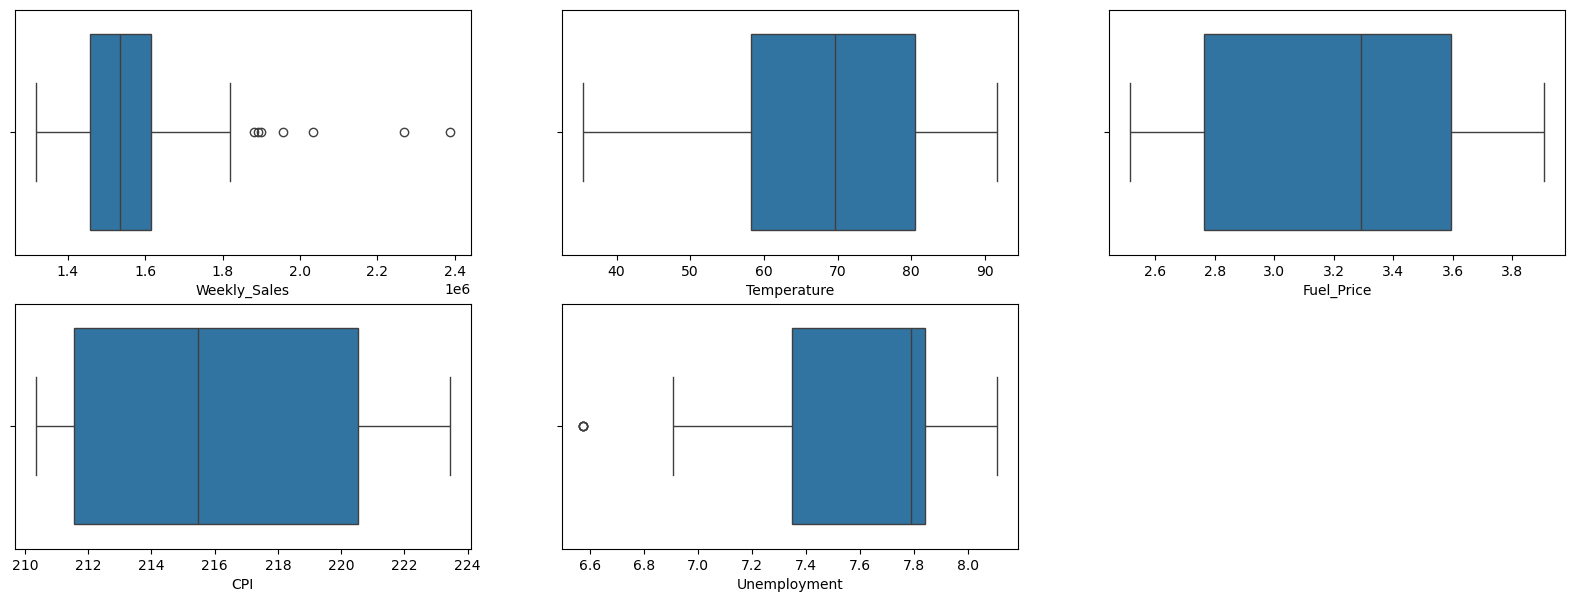

In [1948]:
# converts the columns in to a list while dropping the unnecessary data 
Columns = store1.drop(['Day','Holiday_Flag', 'Year', 'Month', 'Store'],axis = 1).columns.tolist()

# creates subplots (2 rows by 3 columns)
fig, ax = plt.subplots(2,3, figsize = (20,7))

# plots a box and whiskers plot for each column that was stored in Columns
for index, column in enumerate(Columns):
    sns.boxplot(x = column,
    data = pd.DataFrame(store1[column]),
               ax = ax[index//3, index%3])

# Since the list Columns only had 5 entries, and 6 subplots were made, this hides the empty subplot
ax[1,2].axis('off')
plt.show()


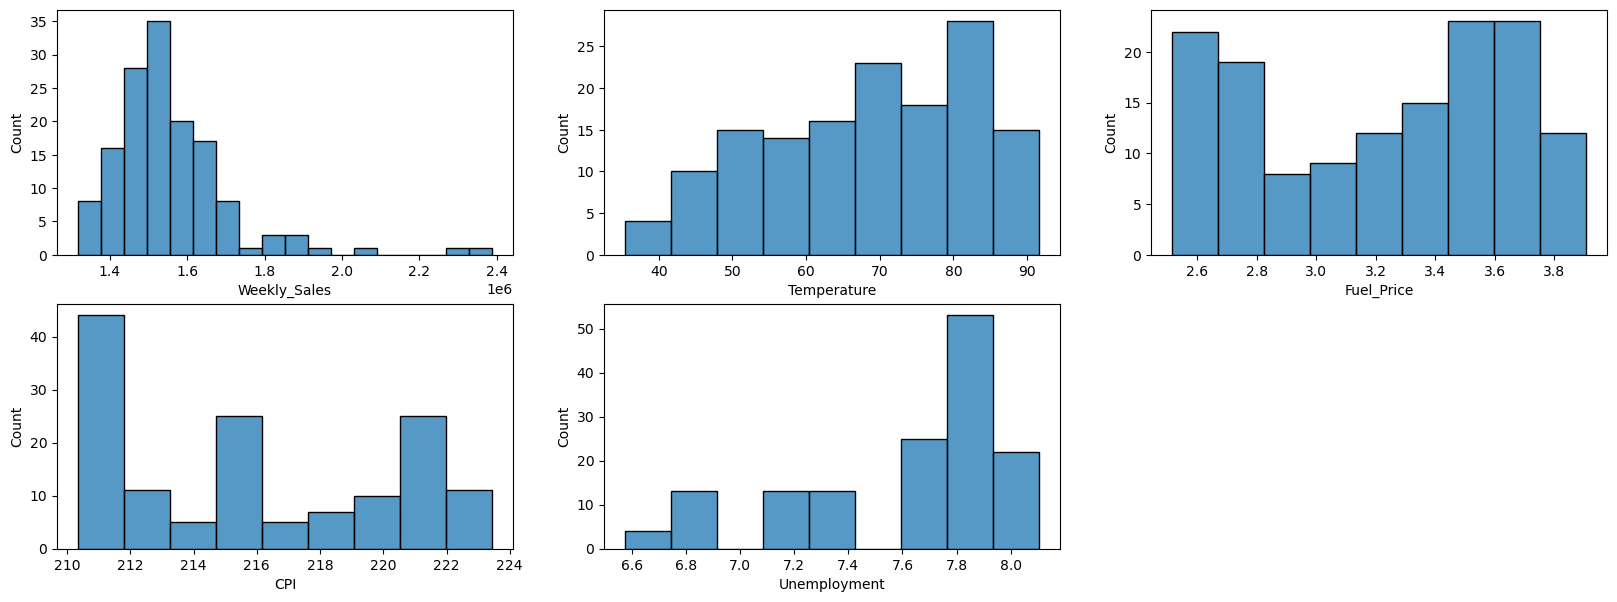

In [1949]:
fig, ax = plt.subplots(2,3, figsize = (20,7))

# plots a histogram
for index, column in enumerate(Columns):
    sns.histplot(x = column,
    data = pd.DataFrame(store1[column]),
               ax = ax[index//3, index%3])
    
ax[1,2].axis('off')
plt.show()

R-squared (Day): 0.978549
R-squared (Temperature): 0.978549
R-squared (Fuel_Price): 0.978549
R-squared (CPI): 0.978549
R-squared (Unemployment): 0.978549


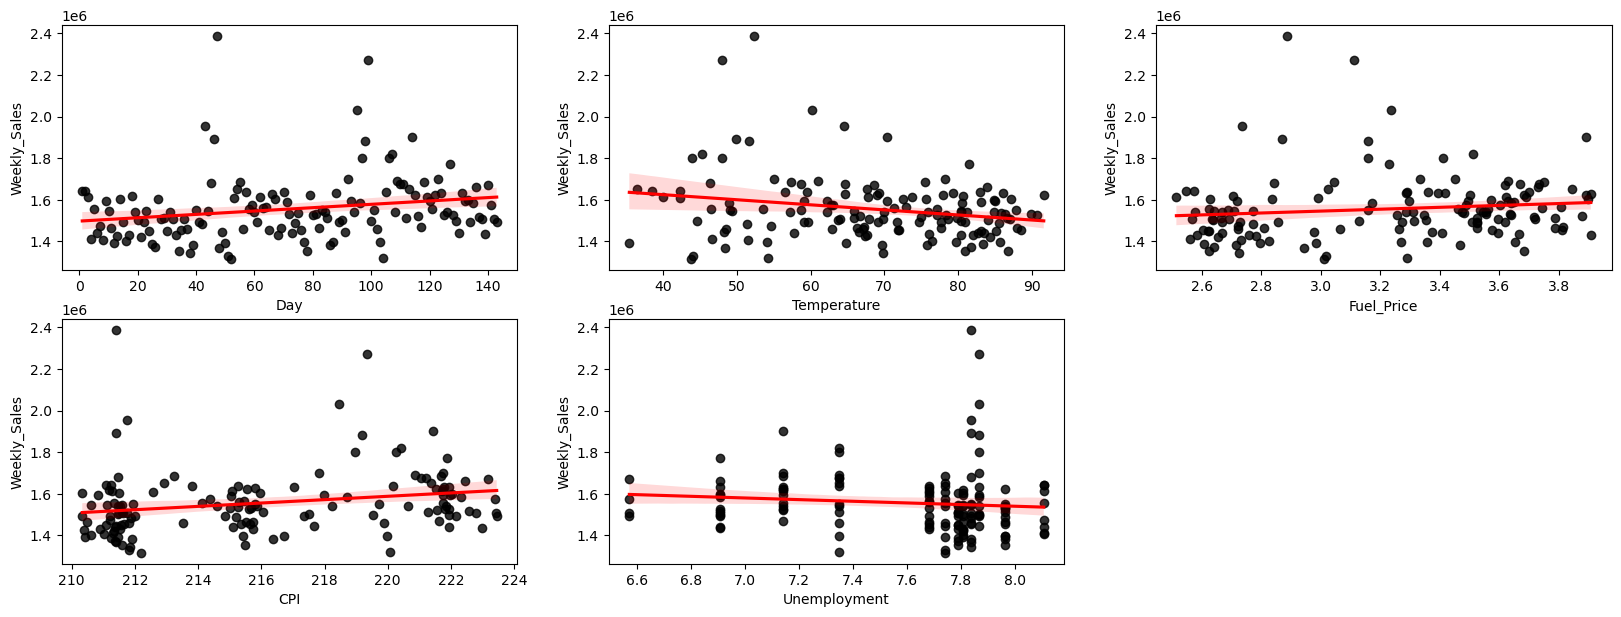

In [1951]:
New_columns = store1.drop(['Weekly_Sales','Holiday_Flag', 'Year', 'Month', 'Store'],axis = 1).columns.tolist()
# ['Day', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

fig, ax = plt.subplots(2,3, figsize = (20,7))

for index, column in enumerate(New_columns):
    sns.regplot(x = column, y = 'Weekly_Sales',
                data = store1[['Weekly_Sales', column]],
                ax = ax[index//3, index%3],
                scatter_kws = {"color":"black"},
                line_kws = {"color":"red"})
    res = stats.linregress(x, y)
    print(f"R-squared ({column}): {res.rvalue**2:.6f}")
  
ax[1,2].axis('off')
plt.show()



<p>Through the R^2 analysis of each plot, there seems to be a strong correlation between the Weekly Sales of Walmart and the independent variables</p>
<ol>
    <li>As the number of days increase as Walmart is in business, the Weekly Sales increase as well</li>
    <li>As temperature increases, Weekly Sales drop, indicating consumer preference to shop in cold to moderate temperature weather</li>
    <li>As fuel prices increases, Weekly Sales increases as well. This potentially can be seen consumers trying to stock up to decrease the unecessary driving</li>
    <li>As CPI increases, Weekly Sales increases as well. Generally a higher CPI indicates higher inflation rates, which would increase store prices, so the increase in Weekly Sales could possibly be from the increase in inflation</li>
    <li>As unemployment percentages increases, Weekly Sales decrease, which is correlates to the overall consumer having less spending power</li>
</ol>